<a href="https://colab.research.google.com/github/MeenakshiGurrala/PDSs/blob/main/Speech_Recognition_Project1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa==0.10.2 numpy==1.24.3

!pip install resampy==0.2.2

  Using cached resampy-0.2.2.tar.gz (323 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320704 sha256=878c931b35747171ab1895bb745f41307cbe2fad625e3d45d5a9c79024394026
  Stored in directory: /root/.cache/pip/wheels/e5/a0/79/29e61754e5b3941ad4c7d01bf5bea99768e64e4bdd3180f32b
Successfully built resampy


In [ ]:
# importing libraries

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset dir
datasetPath = "/content/drive/MyDrive/PDS/dataset/audio_speech_actors_01-24"

In [ ]:
dirList = os.listdir(datasetPath)

emotions = []
paths = []

for dirName in dirList:
    if dirName == ".DS_Store":
        continue
    fname = os.listdir(os.path.join(datasetPath, dirName))
    for f in fname:
        part = f.split('.')[0].split('-')
        emotions.append(int(part[2]))
        paths.append(os.path.join(datasetPath, dirName, f))

In [ ]:
# creating dataframes
dataframe = pd.DataFrame(emotions, columns=['Emotions'])
dataframe = dataframe.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
dataframe['Path'] = paths

dataframe.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/PDS/dataset/audio_speec...
1     fear  /content/drive/MyDrive/PDS/dataset/audio_speec...
2  neutral  /content/drive/MyDrive/PDS/dataset/audio_speec...
3     fear  /content/drive/MyDrive/PDS/dataset/audio_speec...
4    angry  /content/drive/MyDrive/PDS/dataset/audio_speec...

In [ ]:
# shape of the dataset
dataframe.shape

(1440, 2)

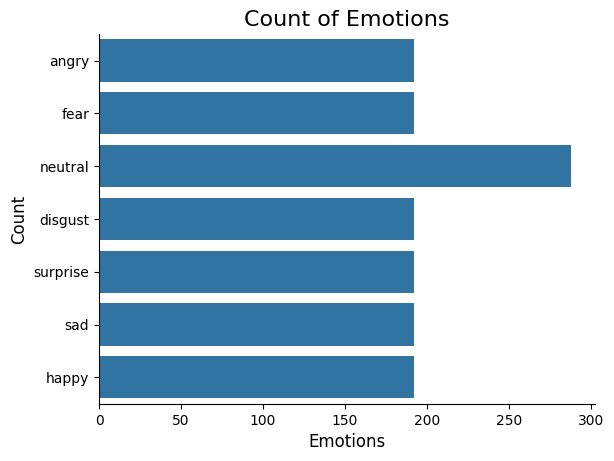

In [ ]:
# Data Visualisation
plt.title('Count of Emotions', size=16)
sns.countplot(dataframe.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [ ]:
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

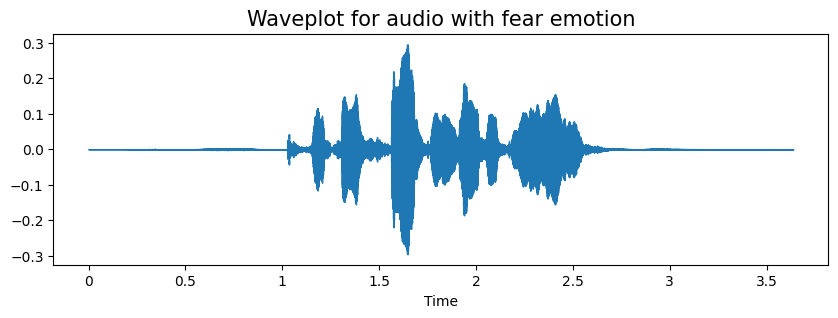

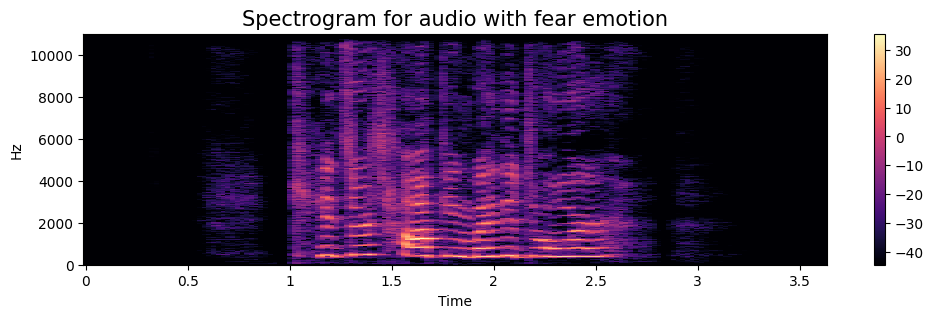

In [ ]:
emotion = 'fear'
path = np.array(dataframe.Path[dataframe.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

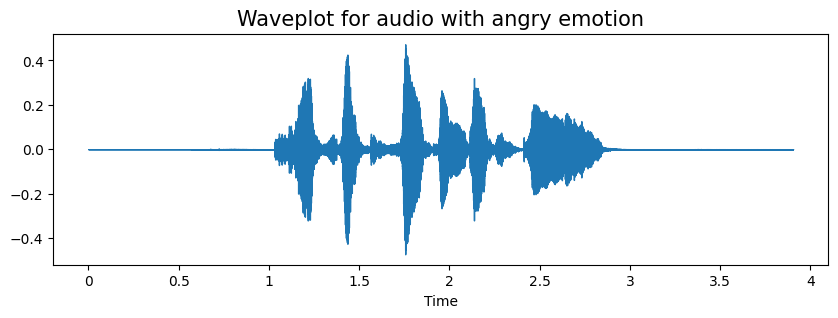

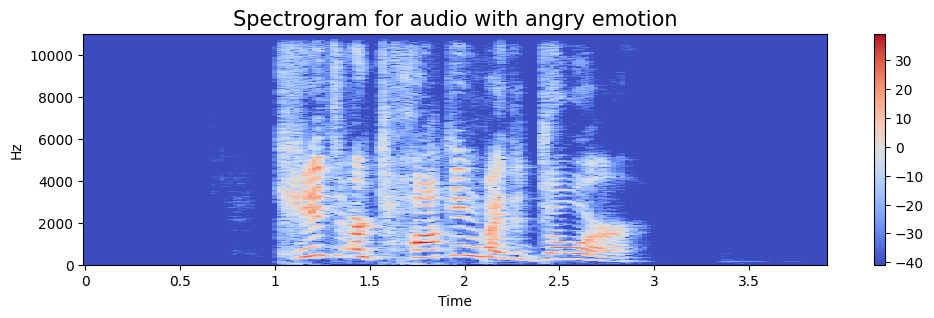

In [ ]:
emotion = 'angry'
path = np.array(dataframe.Path[dataframe.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

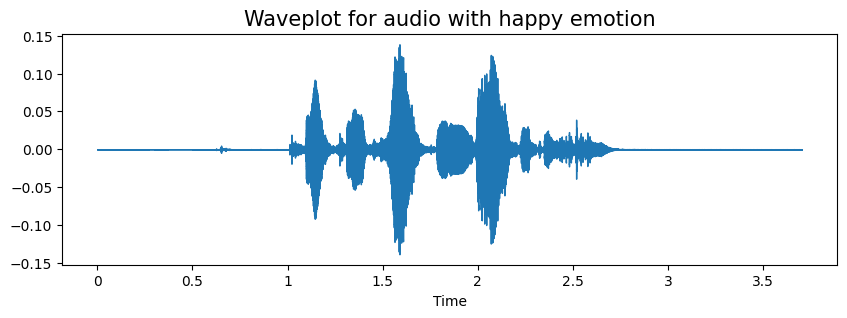

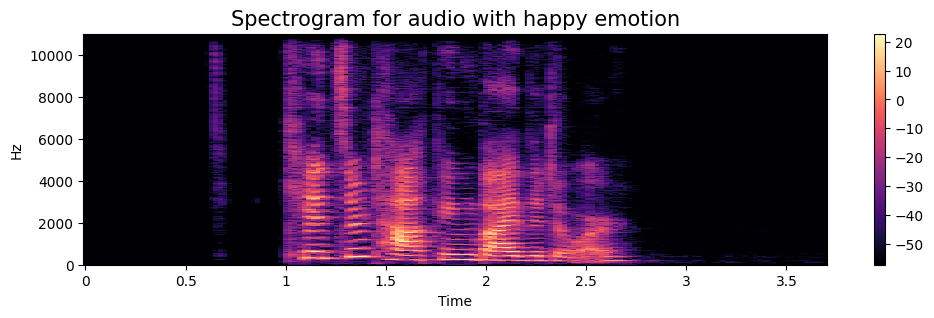

In [ ]:
emotion = 'happy'
path = np.array(dataframe.Path[dataframe.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

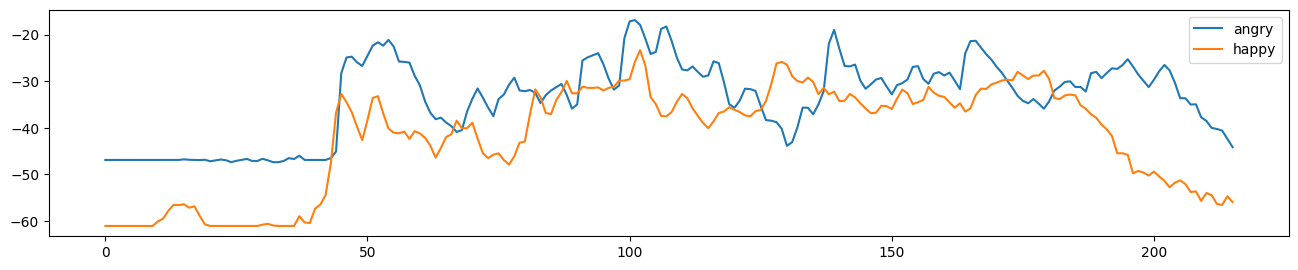

In [ ]:
# Emotion - angry
path = np.array(dataframe.Path[dataframe.Emotions == 'angry'])[1]
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
angry = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
angry = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# Emotion - happy
path = np.array(dataframe.Path[dataframe.Emotions == 'happy'])[1]
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
happy = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
happy = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(angry, label='angry')
plt.plot(happy, label='happy')
plt.legend()
plt.show()

In [ ]:
# Data Augmentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [ ]:
# adding noise, pitch
path = np.array(dataframe.Path)[1]
data, sample_rate = librosa.load(path)

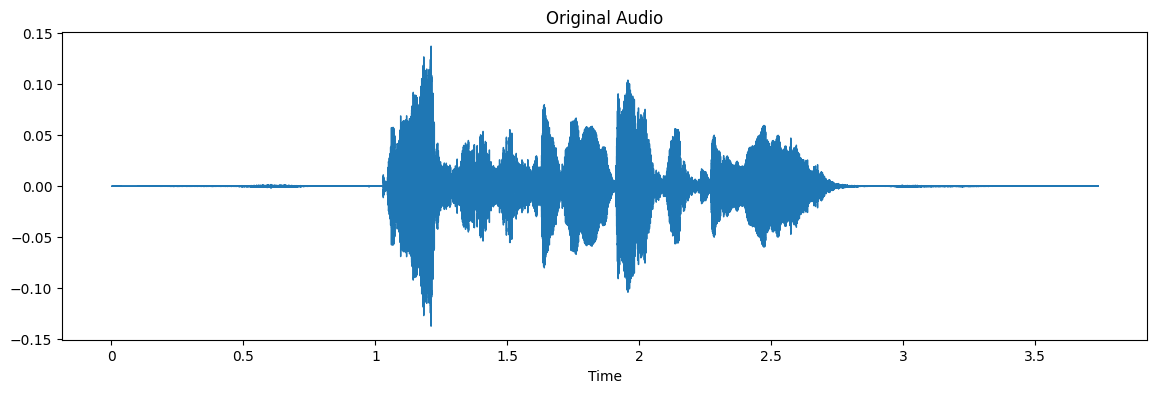

In [ ]:
# original Audio
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title("Original Audio")
Audio(path)

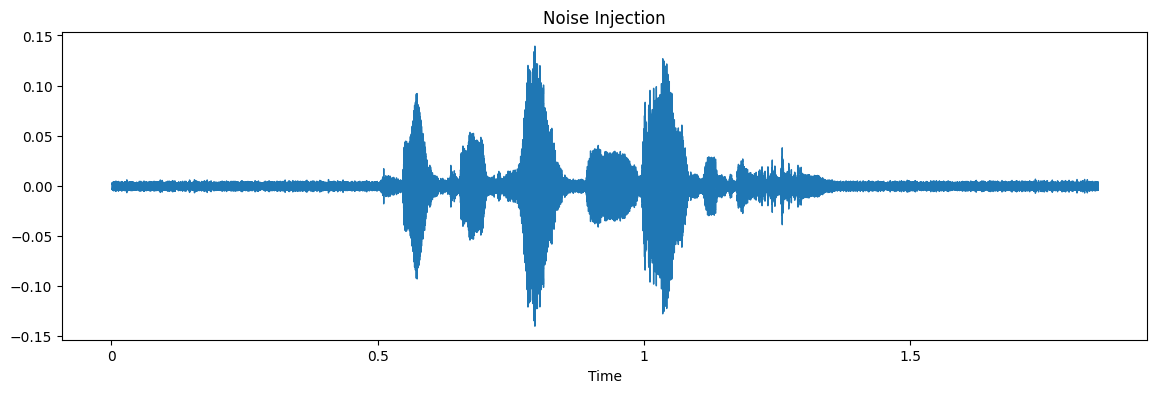

In [ ]:
# Noise Injection
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Noise Injection")
Audio(x, rate=sample_rate)

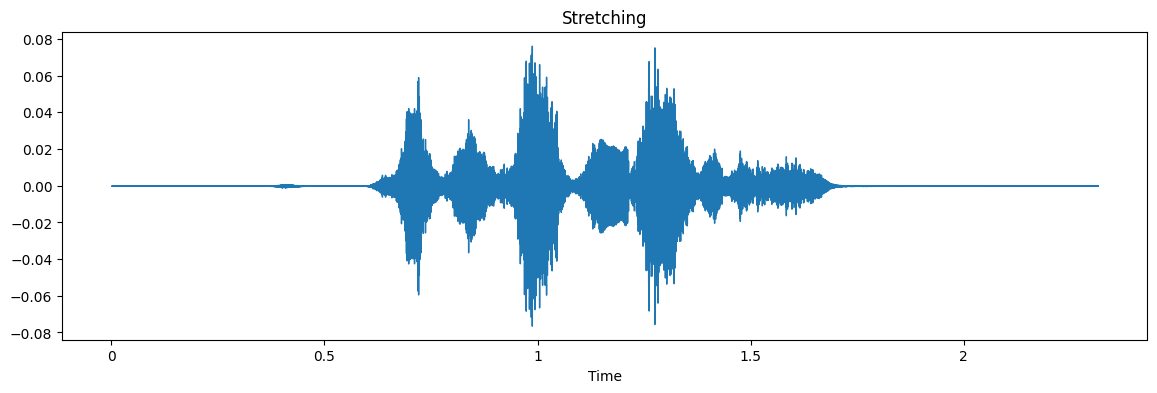

In [ ]:
# Stretching
x = stretch(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Stretching")
Audio(x, rate=sample_rate)

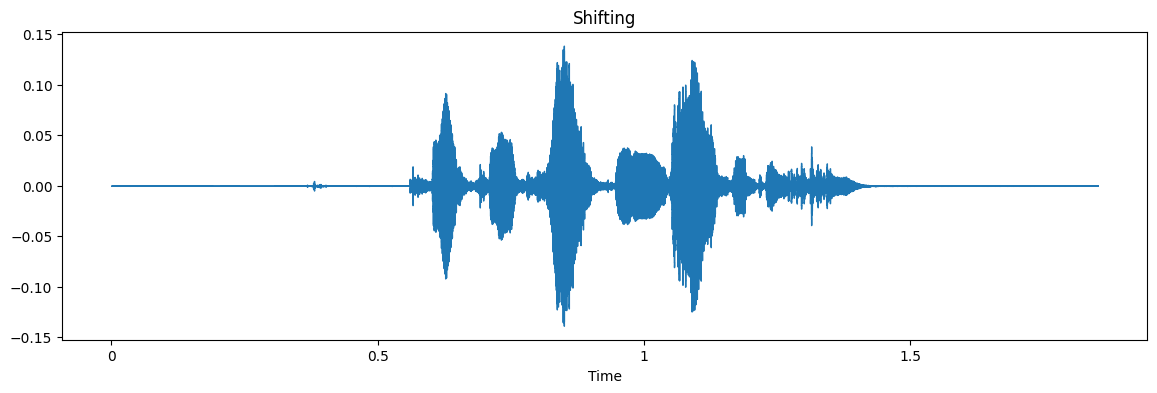

In [ ]:
# Shifting
x = shift(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Shifting")
Audio(x, rate=sample_rate)

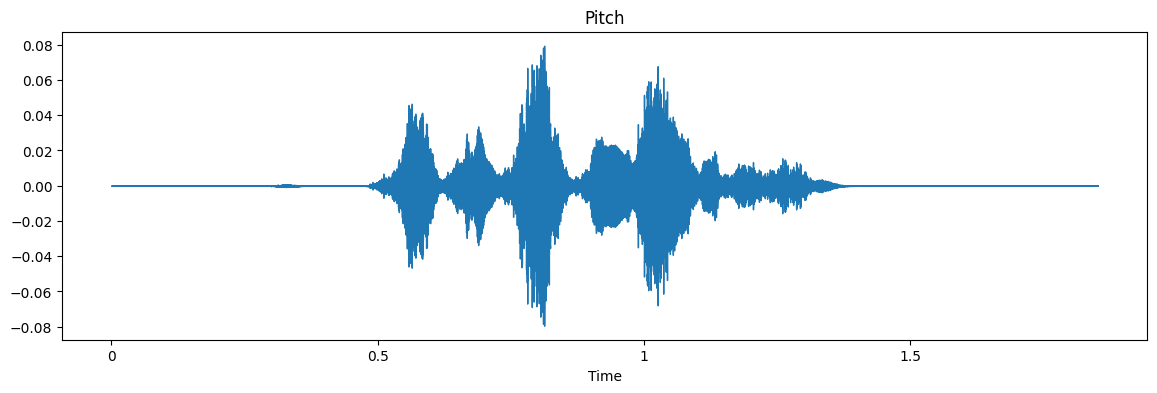

In [ ]:
# Pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Pitch")
Audio(x, rate=sample_rate)

In [ ]:
# Feature Extraction
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    return result

In [ ]:
def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array(extract_features(data))

    noise_data = noise(data)
    result = np.vstack((result, extract_features(noise_data)))

    data_stretch_pitch = pitch(stretch(data), sample_rate)
    result = np.vstack((result, extract_features(data_stretch_pitch)))

    return result

In [ ]:
# Extracting and processing features from dataset
X, Y = [], []
for path, emotion in zip(dataframe.Path, dataframe.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [ ]:
len(X), len(Y), dataframe.Path.shape

(4320, 4320, (1440,))

In [ ]:
# encoding labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# If Y is one-hot encoded, convert it back to 1D
if Y.ndim == 2 and Y.shape[1] > 1:
    Y = np.argmax(Y, axis=1)  # Convert one-hot encoded array to class labels

# Use LabelEncoder for further encoding if necessary
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)  # Ensure Y is now a 1D array


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3, shuffle=True)
print(len(x_train), len(y_train), len(x_test), len(y_test))


3024 3024 1296 1296


In [ ]:
# scaling features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3024, 162), (3024,), (1296, 162), (1296,))

In [ ]:
# y_train = encoder.inverse_transform(y_train)
# y_test = encoder.inverse_transform(y_test)

In [ ]:
print("Total number of training sample: ",x_train.shape[0])
print("Total number of testing example: ",x_test.shape[0])
print("Feature extracted",x_train.shape[1])

Total number of training sample:  3024
Total number of testing example:  1296
Feature extracted 162


In [ ]:
import pickle
pickle.dump(scaler, open("scaler.pkl",'wb'))

In [ ]:
def modelProcess(trainX, testX, trainY, testY, model, name):
    print("Processing {} model".format(name))
    print("Training the model")
    model.fit(trainX, trainY)
    print("Evaluating the model")
    predY = model.predict(testX)
    accuracy = accuracy_score(testY, predY) * 100
    print("Accuracy of {}: {:.2f}%".format(name, accuracy))
    print("-" * 40)
    return accuracy, predY


In [ ]:
# defining model
logistic = LogisticRegression()
svm = SVC()
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()

In [ ]:
# Modeling process for Logistic Regression
logisticAcc, y_predLogistic = modelProcess(x_train, x_test, y_train, y_test, logistic, "Logistic Regression")

# Modeling process for SVM
svmAcc, y_predSVM = modelProcess(x_train, x_test, y_train, y_test, svm, "SVM")

# Modeling process for Adaboost
adaboostAcc, y_predAdaboost = modelProcess(x_train, x_test, y_train, y_test, adaboost, "Adaboost")

# Modeling process for XGBoost
xgboostAcc, y_predXgboost = modelProcess(x_train, x_test, y_train, y_test, xgboost, "XG Boosting")


Processing Logistic Regression model
Training the model
Evaluating the model
Accuracy of Logistic Regression: 57.02%
----------------------------------------
Processing SVM model
Training the model
Evaluating the model
Accuracy of SVM: 58.18%
----------------------------------------
Processing Adaboost model
Training the model
Evaluating the model
Accuracy of Adaboost: 38.35%
----------------------------------------
Processing XG Boosting model
Training the model
Evaluating the model
Accuracy of XG Boosting: 77.24%
----------------------------------------


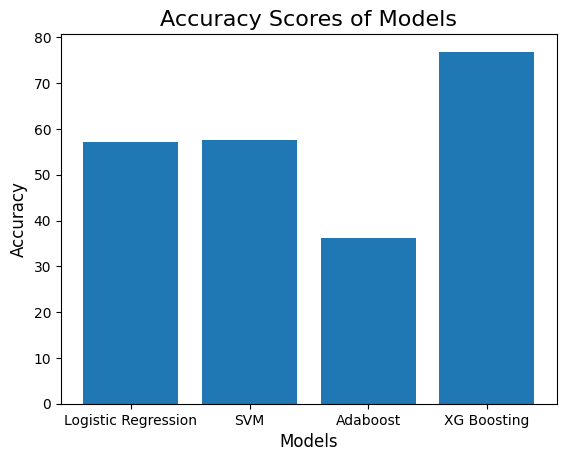

In [ ]:
# visualising results
plt.title('Accuracy Scores of Models', size=16)
scores = [logisticAcc, svmAcc, adaboostAcc, xgboostAcc]
modelNames = ['Logistic Regression', 'SVM', 'Adaboost', 'XG Boosting']
plt.bar(modelNames, scores)
plt.ylabel('Accuracy', size=12)
plt.xlabel('Models', size=12)
plt.show()

In [ ]:
print("The {} model is performing better than other models with score {:.2f}".format(modelNames[np.argmax(scores)], max(scores)))

The XG Boosting model is performing better than other models with score 76.85


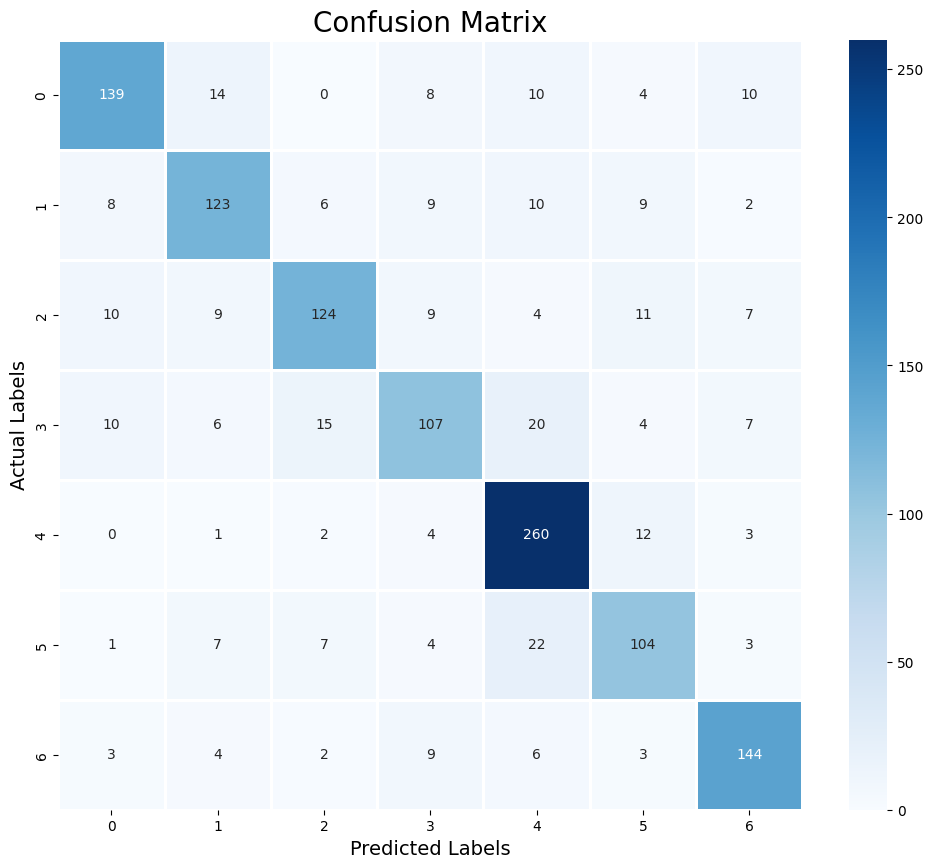

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_predXgboost)

# Create a DataFrame for the confusion matrix with proper labels
cm_df = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='white')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_predXgboost))


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       185
           1       0.75      0.74      0.74       167
           2       0.79      0.71      0.75       174
           3       0.71      0.63      0.67       169
           4       0.78      0.92      0.85       282
           5       0.71      0.70      0.71       148
           6       0.82      0.84      0.83       171

    accuracy                           0.77      1296
   macro avg       0.77      0.76      0.76      1296
weighted avg       0.77      0.77      0.77      1296



In [ ]:
1# saving model
import pickle
xgboost.fit(x_train, y_train)
pickle.dump(xgboost, open("xgboostModel.pkl",'wb'))

In [ ]:
# Live Demo
data, sampling_rate = librosa.load("/content/drive/MyDrive/PDS/dataset/Actor_01/03-01-01-01-01-01-01.wav")

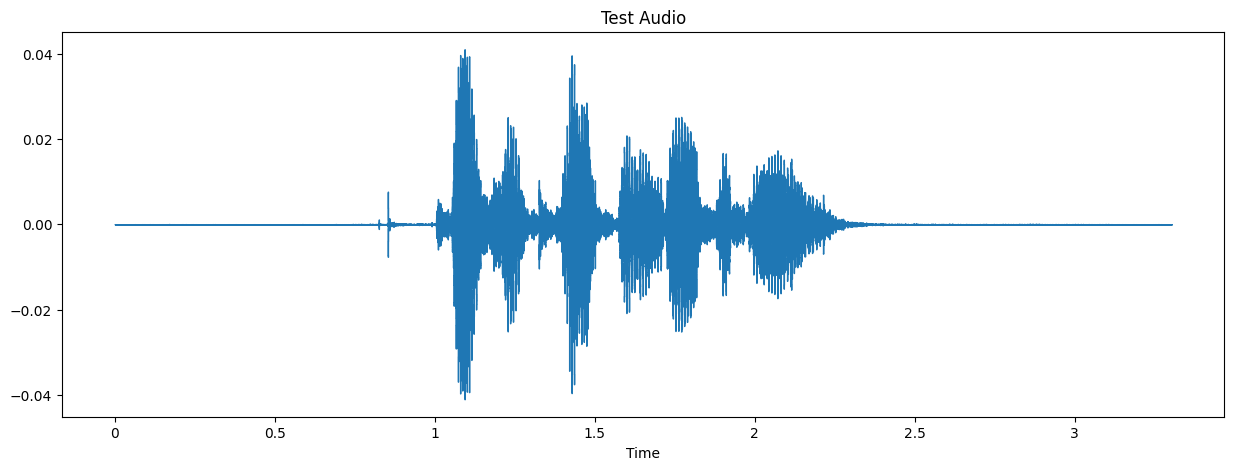

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title("Test Audio")
Audio(data, rate=sample_rate)

In [ ]:
# loading model
model = pickle.load(open("xgboostModel.pkl",'rb'))

In [ ]:
# loading and predicting
feature = get_features("/content/drive/MyDrive/PDS/dataset/Actor_01/03-01-01-01-01-01-01.wav")
predictedResult = model.predict(scaler.transform(feature))[0]
predictedScore = model.predict_proba(scaler.transform(feature))[0]

In [ ]:
print("Predicted emotion is '{}' with score {:.2f}%".format(predictedResult, max(predictedScore)*100 ))

Predicted emotion is '4' with score 99.34%
